In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from math import sqrt
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline


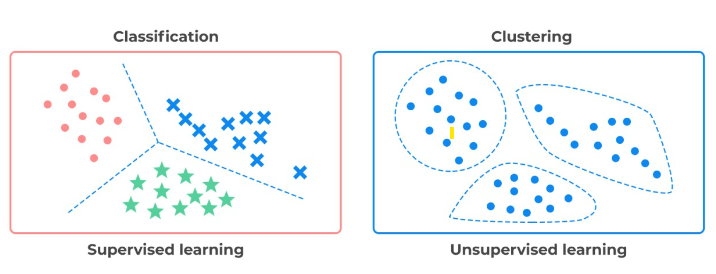

In [ ]:
from IPython.display import Image
Image("supervised.png",width=350)

Create a KNN classifier to determine the kind of the flower
based on its Petail attributes

In [2]:
# Load the iris dataset
iris = load_iris()


In [3]:
# Load the columns relevant to petal length and width to X
X = iris.data[:,2:4]
# Load the target column to y
y = iris.target

In [14]:
print(y.shape)

(150,)


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(type(X_train))

(90, 2)
<class 'numpy.ndarray'>


In [ ]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

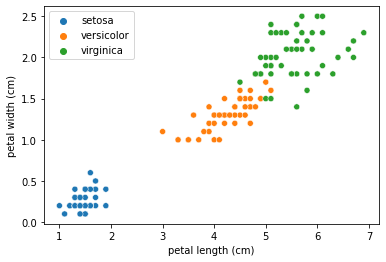

In [ ]:
# Convert the data to a pandas dataframe
# And visualize it using seaborn
# Set the column names to the relevatn feature names:
# (iris.feature_names[2]) and (iris.feature_names[3])
df = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names)
print(df.head())                   
sns.scatterplot(data=df, x=iris.feature_names[2], y=iris.feature_names[3], hue=iris.target_names[y])


In [ ]:
# Create a helper function to calculate the euclidean distance between two points
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [ ]:
def get_neighbors(value, k):
    # Create an array to store the distances
    distances = []
    #  Iterate threrough the training set
    for i in range(len(X_train)):
        # Calculate the distance between the test value and the current value in the train set
        distance = euclidean_distance(value, X_train[i])
        # Append the distance and the class of the current value to the distances array
        distances.append((y_train[i], distance))

    # Sort the distances
    distances.sort(key=lambda y: y[1])

    # Get the k nearest neighbors
    distances = distances[:k]
    return distances

# Predict the class of the first value in the test set
def predict(value, k=3):
    # Get the k nearest neighbors 
    neighbors = get_neighbors(value, k)
    # Get the classes of the neighbors
    neighbor_classes = [x[0] for x in neighbors]
    # Get the most common class
    prediction = max(set(neighbor_classes), key=neighbor_classes.count)
    return prediction



In [ ]:
# Use the predict function to predict the class of a new flower
new_flower = [4,1.5]
predict(new_flower)

1

In [ ]:
# Evaluate the KNN algorigthm
correct = 0
for i in range(len(X_test)):
    prediction = predict(X_test[i], 3)
    #print('Expected %d, Got %d.' % (y_test[i], prediction))
    if y_test[i] == prediction:
        correct += 1
print('Accuracy: %.2f%%' % (correct/len(X_test)*100))

Accuracy: 96.67%


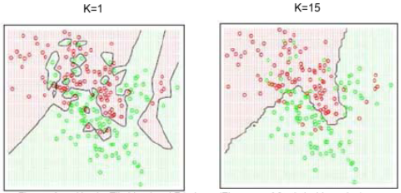

In [ ]:
Image("k_values.png",width=1000)

In [ ]:
# Find the ideal K value for the model
for k in range(1,10):
    correct = 0
    for i in range(len(X_test)):
        prediction = predict(X_test[i],k)
        #print('Expected %d, Got %d.' % (y_test[i], prediction))
        if y_test[i] == prediction:
            correct += 1
    print('Accuracy: %.2f%%' % (correct/len(X_test)*100))

Accuracy: 96.67%
Accuracy: 95.00%
Accuracy: 96.67%
Accuracy: 96.67%
Accuracy: 96.67%
Accuracy: 96.67%
Accuracy: 95.00%
Accuracy: 96.67%
Accuracy: 95.00%


SKLearn libary:
https://scikit-learn.org/stable/modules/model_evaluation.html

In [5]:
# Create a KNN Classifier using the Scikit-Learn library
from sklearn.neighbors import KNeighborsClassifier


k = 3
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
# Evaluate the model on the test set
# Print the accuracy
# Print the classification report
# Print the confusion matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        17
           2       1.00      0.89      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

[[25  0  0]
 [ 0 17  0]
 [ 0  2 16]]


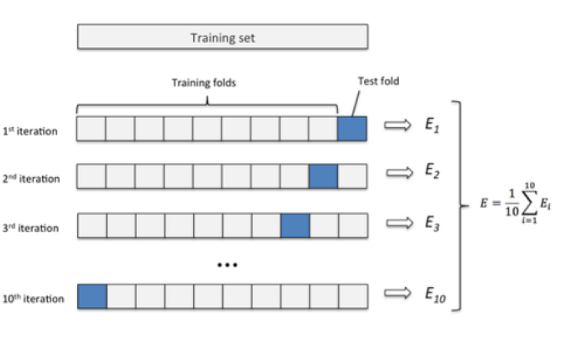

In [ ]:
Image("cross_val.png",width=450)

In [15]:
# Evlaute the KNN algorigthm using cross validation
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=2, metric="euclidean", algorithm='brute')
scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print(np.mean(scores))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
0.9533333333333334


KNN classifier sample solution for diabetes dataset

https://www.kaggle.com/code/amolbhivarkar/knn-for-classification-using-scikit-learn/notebook

KNN classifier sample solution for cancer dataset

https://www.kaggle.com/prashant111/knn-classifier-tutorial.